In [1]:
from util import *
from sklearn.preprocessing import normalize
model = GetModel()

# In this file:
## Plot HMM  & RNN hidden state trajectory
## Locate Repeating Patterns in Synthetic Data
## Compute Aggregate Error 


[ 0.12457243  0.08600771]


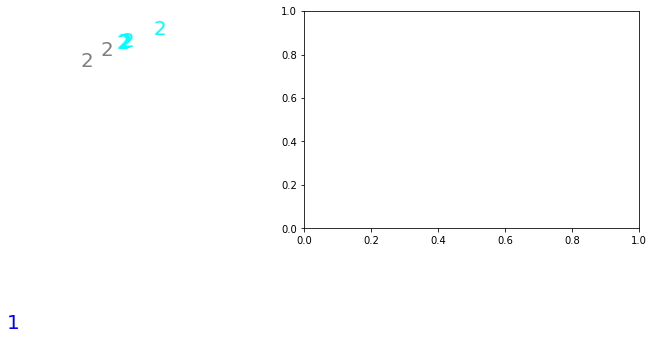

In [13]:
def PlotSample(sample, pred_symbols, pred_states, vec_projected):
    for i in range(len(sample)-1): #range(50, 98):#num_symbols-1):
        
        x, y = vec_projected[i,0], vec_projected[i,1] 
        next_x, next_y = vec_projected[i+1,0], vec_projected[i+1,1] 

        plt.text(x, y, '%d'%(pred_symbols[i]), fontsize=20, color = colors[pred_states[i]])

        plt.arrow(x, y, next_x - x, next_y - y, 
                  color = colors[sample[i]], alpha= 0.5,
                  shape='full', lw=1, length_includes_head=True, head_width=.01)
        # write out predicted sequence and actual sequence at the bottom 
        truth_color = 'black'
        if sample[i] != pred_symbols[i]:
            truth_color = 'red'
        #plt.text( i/100-0.4, -0.55, '%d'%(sample[i]), fontsize=20, color = truth_color)
        #plt.text( i/100-0.4, -0.5, '%d'%(pred_symbols[i]), fontsize=20, color = colors[pred_states[i]])
        
        #if Pattern_Indices[index+1] != i + 1: 
    #plt.axis('off')
    #plt.ylim(-0.6, 0.6)
    #plt.xlim(-0.4, 0.6)
    plt.show()

dataset, struc = Data()
num_samples, num_symbols = dataset.shape

num_samples = 200
dataset = dataset[:num_samples]

dataset_vec = np.concatenate(dataset).reshape(-1, 1)  
lengths = [ num_symbols for x in range(num_samples) ]                

pca = PCA(n_components = 2)
colors = ['blue', 'green', 'red', 'cyan', 'brown', 'grey', 'orange', 'black', 'purple', 'olive']

state_seq_prob = model.predict_proba(dataset_vec[:100*10], lengths[:10])
#state_seq_prob = model.predict_proba(dataset_vec, lengths)
two_dim_Z = pca.fit_transform(state_seq_prob)  

print(pca.explained_variance_)
two_dim_Z = two_dim_Z.reshape(-1, 100, 2)

state_sequences = model.predict( dataset_vec, lengths )
state_sequences = state_sequences.reshape( -1, 100 )

#print(state_sequences.shape)
ss_input = state_sequences.reshape(-1)
#print(ss_input.shape)

best_pred_at_state = np.argmax(model.emissionprob_[ss_input], axis = 1 ).reshape(num_samples, 100)

for sample_num in [3]:
    
    select according to  sample index: actual sequence, predicted symbols, 
    predicted states and projected hidden state    
    
    pattern_indices = np.argwhere(ExtendedRPI[sample_num]).reshape(-1)
    
    sample = dataset[ sample_num][pattern_indices]
    pred_symbols = best_pred_at_state[sample_num][pattern_indices]
    pred_states = state_sequences[sample_num][pattern_indices]
    
    vec_projected = two_dim_Z[sample_num][pattern_indices]
    vec_projected = normalize(vec_projected)
        
    PlotSample( sample, pred_symbols, pred_states, vec_projected )

# indices =  np.arange(100)

# hmm_pred = best_pred_at_state[indices]
# hmm_target = dataset[indices]
# pattern_indices = ExtendedRPI[indices]

# pred_list, truth_list = [], []
# for a, b, i in zip(hmm_pred, hmm_target, pattern_indices):
#     #if len(a) and len(b):
#     pred_list += list(a[i == 1 ])
#     truth_list += list(b[i == 1 ])
        
#         #print( a[i == 1 ], b[i == 1] )

# #print(hmm_pred.shape, hmm_target.shape)
# print(truth_list[0:6], pred_list[0:6])
# ComputeError(np.array(truth_list), np.array(pred_list) )


In [3]:
protein_p, protein_r = ReadTxt('protein_holdout.txt')
syn_p, syn_r = ReadTxt('syn_holdout.txt')

ComputeError(protein_p, protein_r), ComputeError(syn_p, syn_r)

predicted and real sizes:  (50, 85) (50, 85)
predicted and real sizes:  (50, 100) (50, 100)


(0.80800000000000005, 0.027199999999999998)

In [5]:
def GetRepeats():
    num_samples, seq_len = struc.shape
    
    RepeatPatternIndices = struc != 0 #np.argwhere(struc != 0) 
    cache = np.zeros(RepeatPatternIndices.shape)
    
    for i in range( len(RepeatPatternIndices) ):
        for j in range(seq_len):
            if RepeatPatternIndices[i,j] == 1:
                if  j+2 <= seq_len :## pattern not at the end of sequence 
                    cache[i,j:j+4] = 1
                if RepeatPatternIndices[i,j+1] == 0: #or RepeatPatternIndices[i,j+2] == 0: 
                    break
    return cache

ExtendedRPI = GetRepeats()

In [4]:
ExtendedRPI[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [36]:
indices = []
entire_dataset, struc = Data()
#print(entire_dataset.shape)

# for held_out in syn_r:
#     for i, row in enumerate(entire_dataset):

#         matches = (row == held_out).sum()
    
#         if matches == 61:
#             print( (row == held_out).astype(int))
#         indices.append(matches)
    
    
#     print(np.max(indices) )

59
[0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1]
61
61
[0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1]
62
[0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1]
62
62
62
62
62
62
62
62
63
63
63
63
63
63
63
63
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 